In [9]:
from wordcloud import WordCloud

from init import *
from shadertoy.models import *

In [2]:
ShadertoyShader.objects.all().values_list("shader_id").distinct().count()

30324

In [3]:
ShadertoyComment.objects.all().count()

82035

### users by activity

In [4]:
comments = ShadertoyComment.objects.all().values("username", "text")

comments_by_user = dict()
for c in comments:
    comments_by_user[c["username"]] = comments_by_user.get(c["username"], 0) + 1

print("\n".join(
    "%8s %s" % (comments_by_user[user], user)
    for user in sorted(comments_by_user, key=lambda user: -comments_by_user[user])
))

   13728 FabriceNeyret2
    4186 iq
    3674 ollj
    3422 aiekick
    3008 Dave_Hoskins
    2342 Shane
    1606 iapafoto
    1544 GregRostami
    1348 coyote
    1091 dila
    1005 jt
     909 834144373
     678 flockaroo
     673 shau
     637 BigWIngs
     626 poljere
     496 reinder
     468 P_Malin
     459 Duke
     423 CPU
     400 wyatt
     384 demofox
     373 zproxy
     371 MacSlow
     368 ttoinou
     367 stb
     363 Imsure1200q_1UWE130
     358 dr2
     355 ocb
     343 etale_cohomology
     335 movAX13h
     326 scratch13764
     325 eiffie
     307 anastadunbar
     301 ingagard
     301 vgs
     289 abje
     287 pthextract
     270 mackycheese21
     268 fb39ca4
     256 public_int_i
     253 knighty
     244 Klems
     244 mla
     241 PauloFalcao
     238 kuvkar
     237 KylBlz
     236 nimitz
     235 rory618
     227 elenzil
     225 nabr
     224 fizzer
     220 TekF
     220 stduhpf
     218 mattz
     218 CaliCoastReplay
     216 ttg
     203 knarkowicz
    

### comments by date

In [5]:
comments = ShadertoyComment.objects.all().values("username", "date_published")

def dump_comments_by_date(date_format_str):
    comments_by_date = dict()
    for c in comments:
        key = c["date_published"].strftime(date_format_str)
        comments_by_date[key] = comments_by_date.get(key, 0) + 1

    print("\n".join(
        "%8s: %8s posts" % (key, comments_by_date[key])
        for key in sorted(comments_by_date, key=lambda key: -comments_by_date[key])
    ))

print("hour")
dump_comments_by_date("%H:00")
print("weekday")
dump_comments_by_date("%a")
print("month")
dump_comments_by_date("%b")

hour
   16:00:     4870 posts
   17:00:     4747 posts
   15:00:     4467 posts
   20:00:     4448 posts
   21:00:     4321 posts
   19:00:     4239 posts
   18:00:     4163 posts
   14:00:     4160 posts
   08:00:     3978 posts
   13:00:     3938 posts
   12:00:     3808 posts
   09:00:     3715 posts
   22:00:     3658 posts
   07:00:     3430 posts
   11:00:     3401 posts
   10:00:     3280 posts
   23:00:     2973 posts
   00:00:     2415 posts
   06:00:     2295 posts
   01:00:     2173 posts
   02:00:     1974 posts
   03:00:     1931 posts
   05:00:     1829 posts
   04:00:     1822 posts
weekday
     Mon:    12533 posts
     Wed:    12524 posts
     Tue:    12510 posts
     Fri:    12292 posts
     Thu:    11902 posts
     Sun:    10259 posts
     Sat:    10015 posts
month
     Jan:     7826 posts
     Jul:     7564 posts
     Feb:     7429 posts
     Apr:     7400 posts
     Mar:     7281 posts
     Nov:     6764 posts
     May:     6668 posts
     Oct:     6416 posts
     J

## wordclouds by user

In [33]:
def comments_wordcloud(**filter_params):
    print(", ".join("%s = %s" % (key, filter_params[key]) for key in sorted(filter_params)))
    qset = ShadertoyComment.objects.filter(**filter_params)
    text = " ".join(v[0] for v in qset.values_list("text")).lower()
    return WordCloud(
        width=800,
        background_color="white"
    ).generate(text).to_image()

username = iq


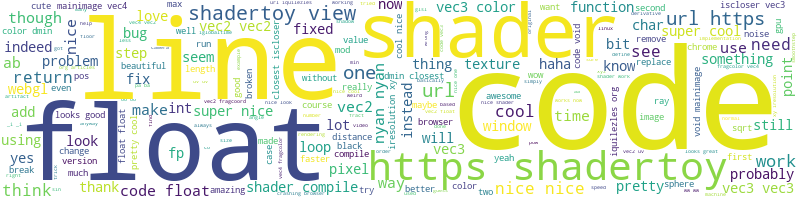

In [34]:
comments_wordcloud(username="iq")

username = Shane


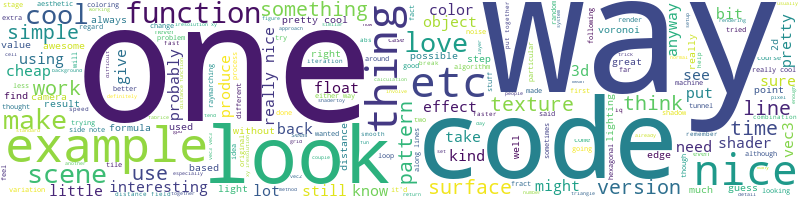

In [35]:
comments_wordcloud(username="Shane")

username = Dave_Hoskins


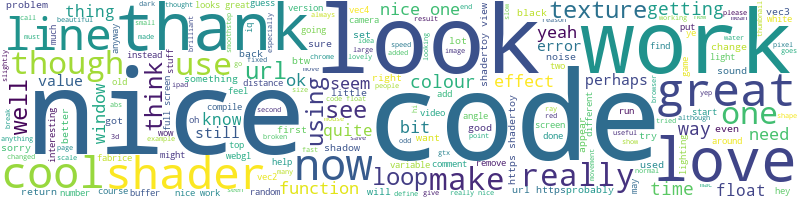

In [36]:
comments_wordcloud(username="Dave_Hoskins")